#   Google App Reviews

This file contains the first 'most relevant' 100 reviews for each app. Each review text/comment has been pre-processed and attributed with 3 new features - Sentiment, Sentiment Polarity and Sentiment Subjectivity.


In [152]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [136]:
# Loading data

df = pd.read_csv('googleplaystore_user_reviews.csv/googleplaystore_user_reviews.csv')

In [137]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [87]:
df.shape

(64295, 5)

###  Null-Value Treatment

In [138]:
# Display the number of null values

df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [139]:
# Drop null values

df.dropna(axis=0,inplace=True)

In [140]:
# Check null values again

df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [141]:
df.shape

(37427, 5)

In [142]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


##  Exploratory Data Analysis

Here, I have grouped the dataframe by the apps and displayed total number of positive, negative and neutral reviews for all the apps in a separate dataframe.

In [143]:
# Created an empty dataframe with 3 columns
# Assigned value column-wise for each app

a = pd.DataFrame(index=df['App'].value_counts().index,columns=['Positive','Negative','Neutral'])
for i in df['App'].value_counts().index:
    a['Positive'][i] = len(df[(df['App']==i) & (df['Sentiment']=='Positive')])
    a['Negative'][i] = len(df[(df['App']==i) & (df['Sentiment']=='Negative')])
    a['Neutral'][i]  = len(df[(df['App']==i) & (df['Sentiment']=='Neutral')])

In [144]:
# Display head

a.head()

,Positive,Negative,Neutral
Bowmasters,169,119,24
Angry Birds Classic,124,147,2
Helix Jump,209,58,6
Calorie Counter - MyFitnessPal,169,52,33
Candy Crush Saga,102,126,12


###  Top 20 apps with positive reviews

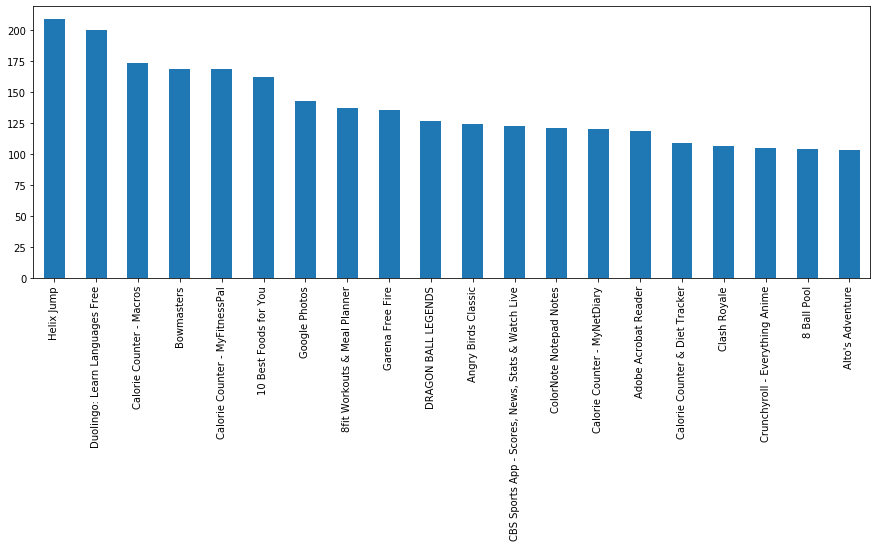

In [79]:
plt.figure(figsize=(15,5))
a['Positive'].sort_values(ascending=False)[:20].plot.bar()
plt.show()

###  Top 20 apps with negative reviews

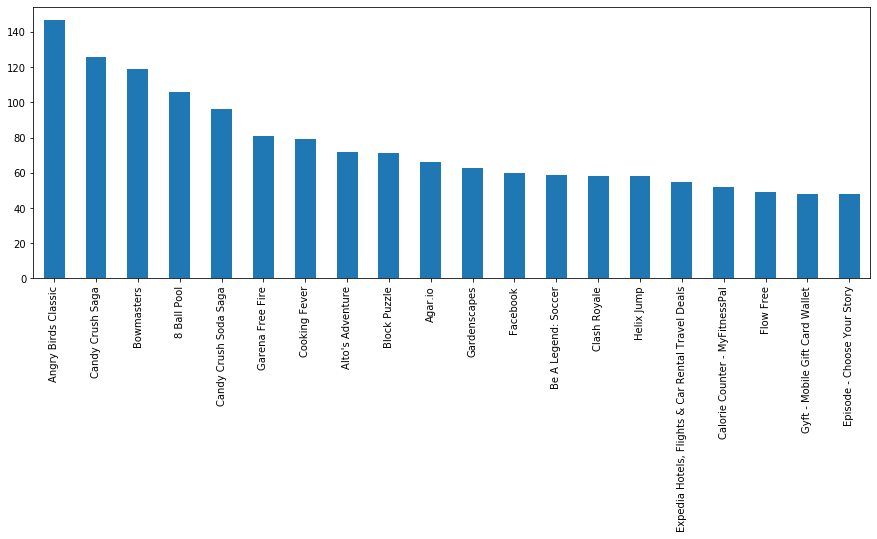

In [80]:
plt.figure(figsize=(15,5))
a['Negative'].sort_values(ascending=False)[:20].plot.bar()
plt.show()

#  Model Building

In this section, we will only analyse the reviews and the sentiment related to do the sentiment analysis of an app.

In [145]:
# Drop the unnecessary columns

df.drop(['Sentiment_Polarity','Sentiment_Subjectivity','App'],axis=1,inplace=True)

In [146]:
df.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive


In [147]:
# Define x and y

X = df['Translated_Review']
y = df['Sentiment']

In [148]:
# Train-test split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [149]:
# Initialize count-vectorizer and transform train and test

vect = CountVectorizer(lowercase=True,stop_words='english')
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

In [150]:
# Apply the models and compare results

rf = RandomForestClassifier()
rf.fit(x_train_dtm,y_train)
print('Test score for Random-Forest   :',rf.score(x_test_dtm,y_test))

nb = MultinomialNB()
nb.fit(x_train_dtm,y_train)
print('Test score Naive-Bayes         :',nb.score(x_test_dtm,y_test))

lr = LogisticRegression()
lr.fit(x_train_dtm,y_train)
print('Test score Logistic-Regression :',lr.score(x_test_dtm,y_test))

Test score for Random-Forest   : 0.8962507792323449
Test score Naive-Bayes         : 0.7735328168136076
Test score Logistic-Regression : 0.9069373942470389


In [155]:
# Print classification reports

y_pred_rf = rf.predict(x_test_dtm)
y_pred_lr = lr.predict(x_test_dtm)

print('Classification report with Random-Forest  :\n ',classification_report(y_test,y_pred_rf),'\n')
print('Classification with Logistic Regression  :\n ',classification_report(y_test,y_pred_lr))

Classification report with Random-Forest  :
                precision    recall  f1-score   support

    Negative       0.94      0.74      0.83      2524
     Neutral       0.82      0.87      0.85      1566
    Positive       0.90      0.96      0.93      7139

    accuracy                           0.90     11229
   macro avg       0.89      0.86      0.87     11229
weighted avg       0.90      0.90      0.89     11229
 

Classification with Logistic Regression  :
                precision    recall  f1-score   support

    Negative       0.89      0.82      0.86      2524
     Neutral       0.81      0.89      0.85      1566
    Positive       0.94      0.94      0.94      7139

    accuracy                           0.91     11229
   macro avg       0.88      0.89      0.88     11229
weighted avg       0.91      0.91      0.91     11229



We see that Random Forest and Logistic Regression are both performing good on our dataset. For the negative reviews, Random-Forest is giving a better result than Logistic, whereas, for the positive class, Logistic is giving better results. Both are giving almost similar results for the Neutral class.